<a href="https://colab.research.google.com/github/BenjaAR/LAB08_AQUINO-REYES/blob/main/LAB_08_AQUINO_REYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEMANA 8: ÁRBOLES DE DECISIÓN. BOSQUES ALEATORIOS**

---

Alumno: Aquino Reyes Benjy Alvaro

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# variable information
breast_cancer_wisconsin_original.variables


,name,role,type,demographic,description,units,missing_values
0,Sample_code_number,ID,Categorical,None,None,None,no
1,Clump_thickness,Feature,Integer,None,None,None,no
2,Uniformity_of_cell_size,Feature,Integer,None,None,None,no
3,Uniformity_of_cell_shape,Feature,Integer,None,None,None,no
4,Marginal_adhesion,Feature,Integer,None,None,None,no
5,Single_epithelial_cell_size,Feature,Integer,None,None,None,no
6,Bare_nuclei,Feature,Integer,None,None,None,yes
7,Bland_chromatin,Feature,Integer,None,None,None,no
8,Normal_nucleoli,Feature,Integer,None,None,None,no
9,Mitoses,Feature,Integer,None,None,None,no


In [4]:
# 3. Unir en un solo DataFrame
df_01 = pd.concat([X, y], axis=1)

df_01

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [5]:
# 1. Imputación de valores faltantes
imputer = SimpleImputer(strategy='most_frequent')  # Usamos la estrategia más frecuente para imputar
df_01['Bare_nuclei'] = imputer.fit_transform(df_01[['Bare_nuclei']])

In [8]:
# 2. Tratamiento de outliers
# Usamos el método del rango intercuartílico (IQR) para detectar y tratar los outliers
Q1 = df_01.quantile(0.25)
Q3 = df_01.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar los outliers por el valor más cercano dentro del rango
df = df_01.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]) if x.name in lower_bound.index else x)


In [9]:
# 3. Transformación de datos (si es necesario)
# Normalizamos las variables numéricas
scaler = StandardScaler()
features = df.drop('Class', axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 4. Separación de las variables de clasificación
X = df_scaled
y = df_01['Class']

In [10]:
# 5. División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Unir X y y para crear el DataFrame final
df_01 = pd.concat([X_train, y_train], axis=1)

df_01.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
163,-1.214667,-0.699995,-0.743299,-0.267483,-1.153579,-0.134392,-1.010100,-0.630355,0.0,2
286,1.983939,2.251526,2.287222,2.269699,2.227351,1.799664,0.240301,2.110943,0.0,4
612,1.273138,2.251526,2.287222,2.269699,1.663863,1.799664,2.532704,2.110943,0.0,4
517,-1.214667,-0.699995,-0.743299,-0.657819,-1.153579,-0.686979,-0.593300,-0.630355,0.0,2
464,-0.148465,-0.699995,-0.743299,-0.657819,-0.590091,-0.686979,-1.010100,-0.630355,0.0,2


**Modelo Gradient Boosting**

El modelo de Gradient Boosting funciona mediante el entrenamiento secuencial de árboles, donde cada árbol trata de corregir los errores del árbol anterior. Aunque es un modelo muy potente, es importante ajustar ciertos parámetros para obtener el mejor rendimiento.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 6. Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 7. Entrenar el modelo
gb_model.fit(X_train, y_train)

# 8. Hacer predicciones sobre el conjunto de prueba
y_pred = gb_model.predict(X_test)

Matriz de Confusión:
 [[115   3]
 [  5  52]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           2       0.96      0.97      0.97       118
           4       0.95      0.91      0.93        57

    accuracy                           0.95       175
   macro avg       0.95      0.94      0.95       175
weighted avg       0.95      0.95      0.95       175

Precisión (Accuracy): 0.9542857142857143


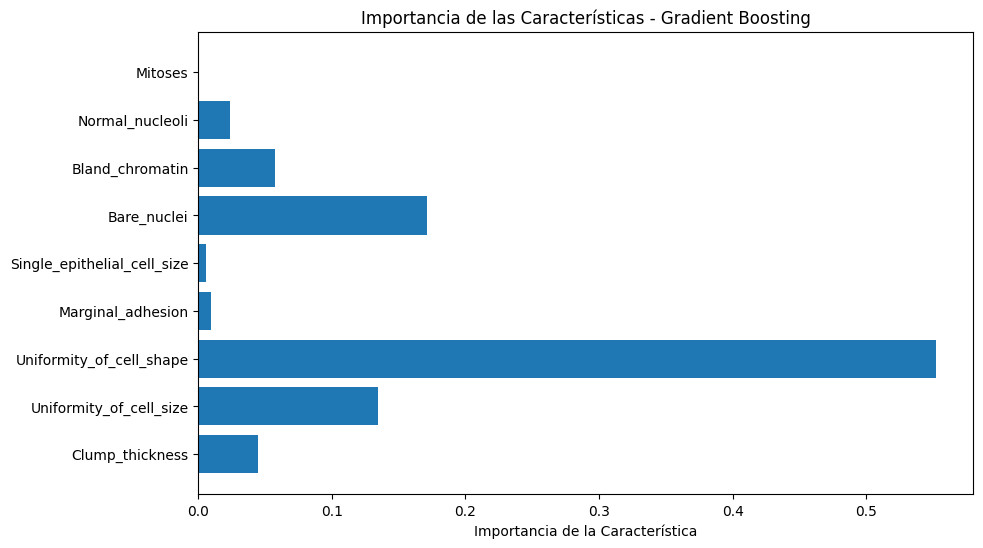

In [13]:
# 9. Evaluación del modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Precisión (Accuracy):", accuracy_score(y_test, y_pred))

# 10. Visualización de la Importancia de las Características
feature_importance = gb_model.feature_importances_

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(feature_importance)), X.columns)
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de las Características - Gradient Boosting')
plt.show()


Resumen:
Precisión total del modelo es 95%, lo cual es excelente.

*  La matriz de confusión muestra un modelo con pocos falsos positivos y falsos negativos, lo que significa que está funcionando bien en ambos grupos (Clase 2 y Clase 4).

* El modelo tiene un gran desempeño en términos de precisión, recall y F1-score, especialmente para la Clase 2.

* El gráfico de importancia de las características te ayuda a entender qué variables son las más influyentes para el modelo.

## **Modelo de Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# 2. Entrenar el modelo de Random Forest
rf_model.fit(X_train, y_train)

# 3. Hacer predicciones sobre el conjunto de prueba con el modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluación del modelo de Random Forest
print("Matriz de Confusión (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Precisión (Accuracy) (Random Forest):", accuracy_score(y_test, y_pred_rf))

Matriz de Confusión (Random Forest):
 [[115   3]
 [  4  53]]

Reporte de Clasificación (Random Forest):
               precision    recall  f1-score   support

           2       0.97      0.97      0.97       118
           4       0.95      0.93      0.94        57

    accuracy                           0.96       175
   macro avg       0.96      0.95      0.95       175
weighted avg       0.96      0.96      0.96       175

Precisión (Accuracy) (Random Forest): 0.96


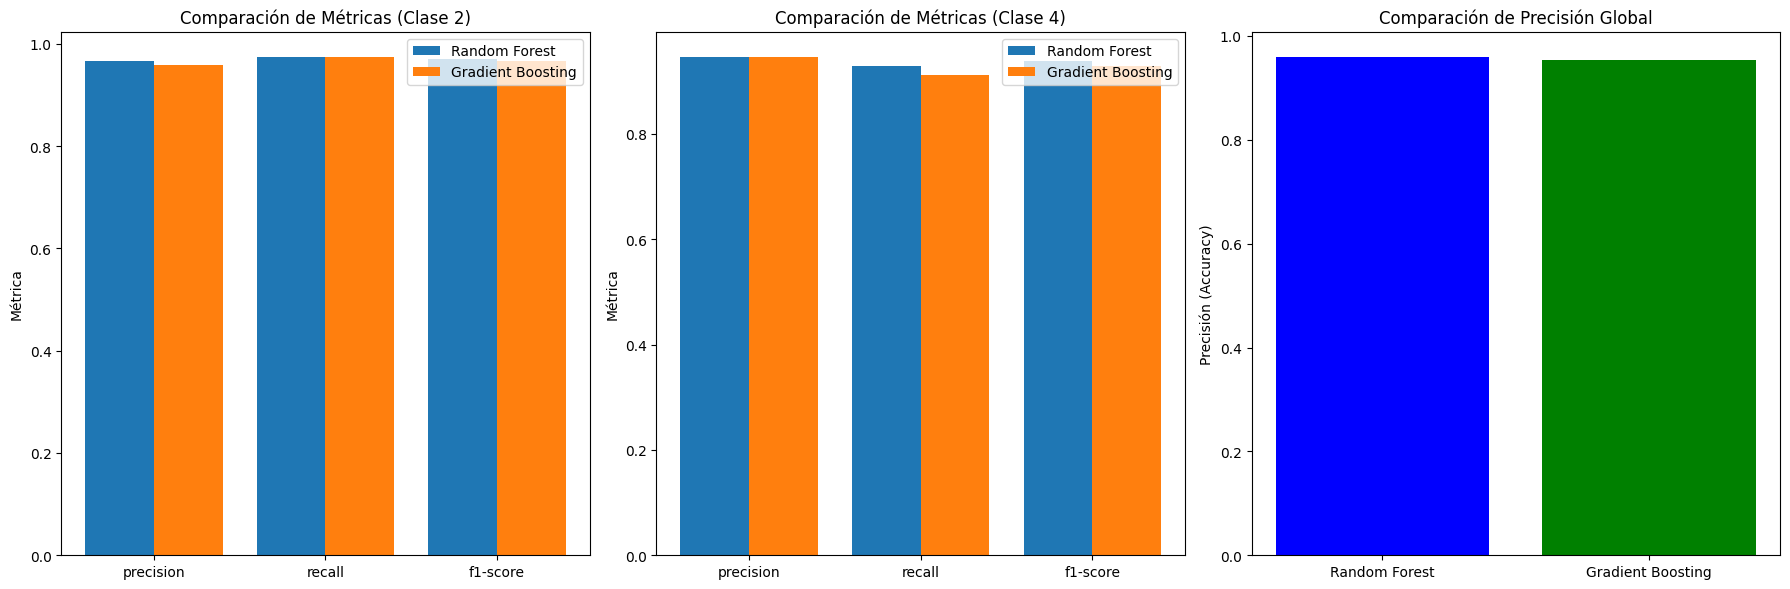

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Asumiendo que ya tienes los resultados de las predicciones para ambos modelos
# y_pred_rf (Random Forest) y y_pred (Gradient Boosting)

# Obtener el reporte de clasificación para Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Obtener el reporte de clasificación para Gradient Boosting
report_gb = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas de interés para cada modelo
metrics = ['precision', 'recall', 'f1-score']

# Extraer las métricas para la clase '2' y '4'
rf_class_2 = [report_rf['2'][metric] for metric in metrics]
rf_class_4 = [report_rf['4'][metric] for metric in metrics]

gb_class_2 = [report_gb['2'][metric] for metric in metrics]
gb_class_4 = [report_gb['4'][metric] for metric in metrics]

# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Comparación para la clase 2
axes[0].bar(np.arange(len(metrics)) - 0.2, rf_class_2, width=0.4, label='Random Forest', align='center')
axes[0].bar(np.arange(len(metrics)) + 0.2, gb_class_2, width=0.4, label='Gradient Boosting', align='center')
axes[0].set_xticks(np.arange(len(metrics)))
axes[0].set_xticklabels(metrics)
axes[0].set_title('Comparación de Métricas (Clase 2)')
axes[0].set_ylabel('Métrica')
axes[0].legend()

# Comparación para la clase 4
axes[1].bar(np.arange(len(metrics)) - 0.2, rf_class_4, width=0.4, label='Random Forest', align='center')
axes[1].bar(np.arange(len(metrics)) + 0.2, gb_class_4, width=0.4, label='Gradient Boosting', align='center')
axes[1].set_xticks(np.arange(len(metrics)))
axes[1].set_xticklabels(metrics)
axes[1].set_title('Comparación de Métricas (Clase 4)')
axes[1].set_ylabel('Métrica')
axes[1].legend()

# Comparación de precisión global
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred)

axes[2].bar(['Random Forest', 'Gradient Boosting'], [accuracy_rf, accuracy_gb], color=['blue', 'green'])
axes[2].set_title('Comparación de Precisión Global')
axes[2].set_ylabel('Precisión (Accuracy)')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
